In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("data (2).csv")
df

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Lionel Messi,22/23,Ligue 1,12,2022-10-21,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,0:2,Left-footed shot,Kylian Mbappe
1395,Lionel Messi,22/23,UEFA Champions League,Group Stage,2022-10-25,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,44,4:1,Left-footed shot,Kylian Mbappe
1396,Lionel Messi,22/23,UEFA Champions League,Group Stage,2022-10-25,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,19,1:0,Left-footed shot,Kylian Mbappe
1397,Cristiano Ronaldo,22/23,Europa League,Group Stage,2022-10-27,H,Manchester United,FC Sheriff,3:0,CF,81,3:0,Left-footed shot,NaN


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')

In [13]:
df.replace('11-Dec','11/12', inplace=True)
df.replace('Dec-13','12/13', inplace=True)

In [14]:
df.replace('Taca de Portugal Placard','Liga Portugal', inplace=True)
df.replace('Liga Portugal','Premier League', inplace=True)
df.replace('EFL Cup','Premier League', inplace=True)
df.replace('Supercoppa Italiana','Serie A', inplace=True)
df.replace('Italy Cup','Serie A', inplace=True)
df.replace('FA Cup','Premier League', inplace=True)
df.replace('UEFA Champions League Qualifying','UEFA', inplace=True)
df.replace('UEFA Champions League','UEFA', inplace=True)
df.replace('UEFA Super Cup','UEFA', inplace=True)
df.replace('Champions League','UEFA', inplace=True)
df.replace('Europa League','UEFA', inplace=True)
df.replace('Trophee des Champions','Trophée des Champions', inplace=True)
df.replace('Trophée des Champions','UEFA', inplace=True)

In [15]:
df['Result'] = df['Result'].str.replace('AET', '')
df['Result'] = df['Result'].str.replace('on pens', '')

df['WDL'] = 0

for i in range(len(df)):
    if df.Venue[i] == 'H':
        if df.Result[i].split(':')[0] > df.Result[i].split(':')[-1]:
            df['WDL'][i] = 'W'
        elif df.Result[i].split(':')[0] < df.Result[i].split(':')[-1]:
            df['WDL'][i] = 'L'
        else: 
            df['WDL'][i] = 'D'
    else:
        if df.Result[i].split(':')[0] < df.Result[i].split(':')[-1]:
            df['WDL'][i] = 'W'
        elif df.Result[i].split(':')[0] > df.Result[i].split(':')[-1]:
            df['WDL'][i] = 'L'
        else: 
            df['WDL'][i] = 'D'

In [16]:
df['Goal_assist'].fillna('No assist', inplace=True)
df['Goal_assist1'] = df['Goal_assist'].where(df['Goal_assist'] == 'No assist', 'Assist')

PERFORMANCE OVERTIME

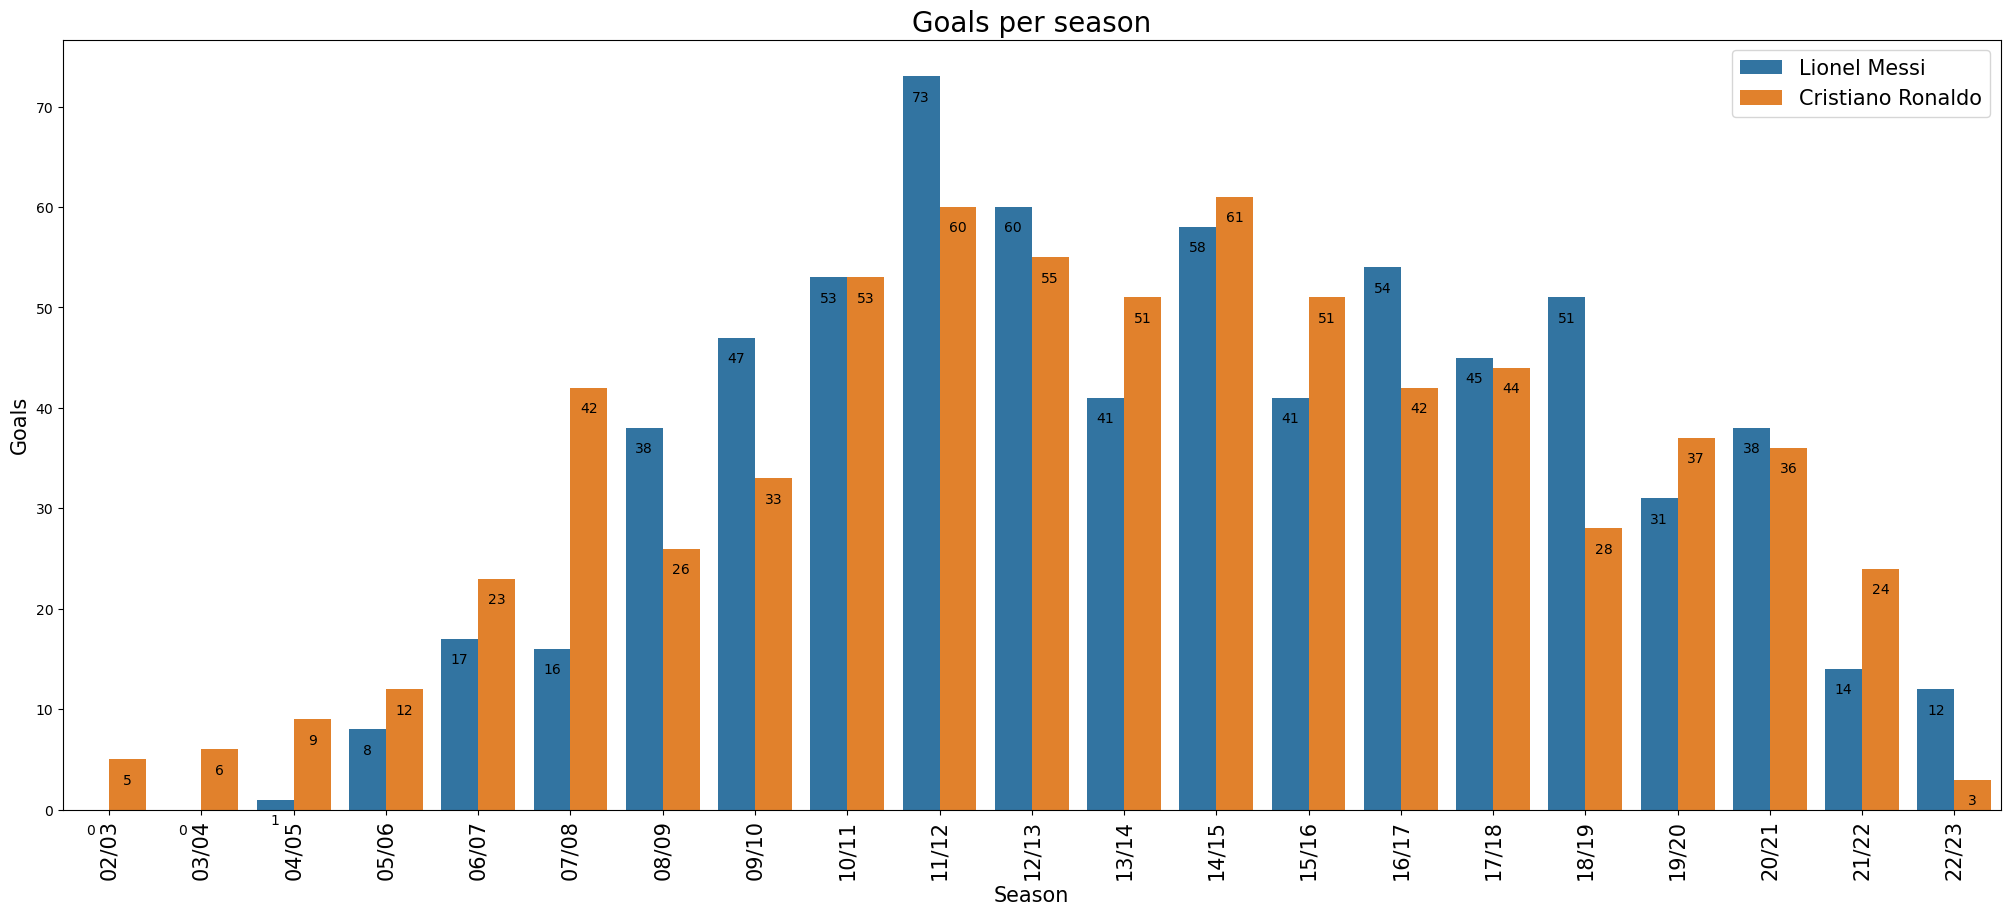

In [17]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="Season", hue="Player", data=df,
              hue_order=['Lionel Messi','Cristiano Ronaldo'],
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-20)
plt.title("Goals per season", fontsize=20)
plt.xticks(fontsize=15, rotation='vertical')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Goals', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Performance by Competitions

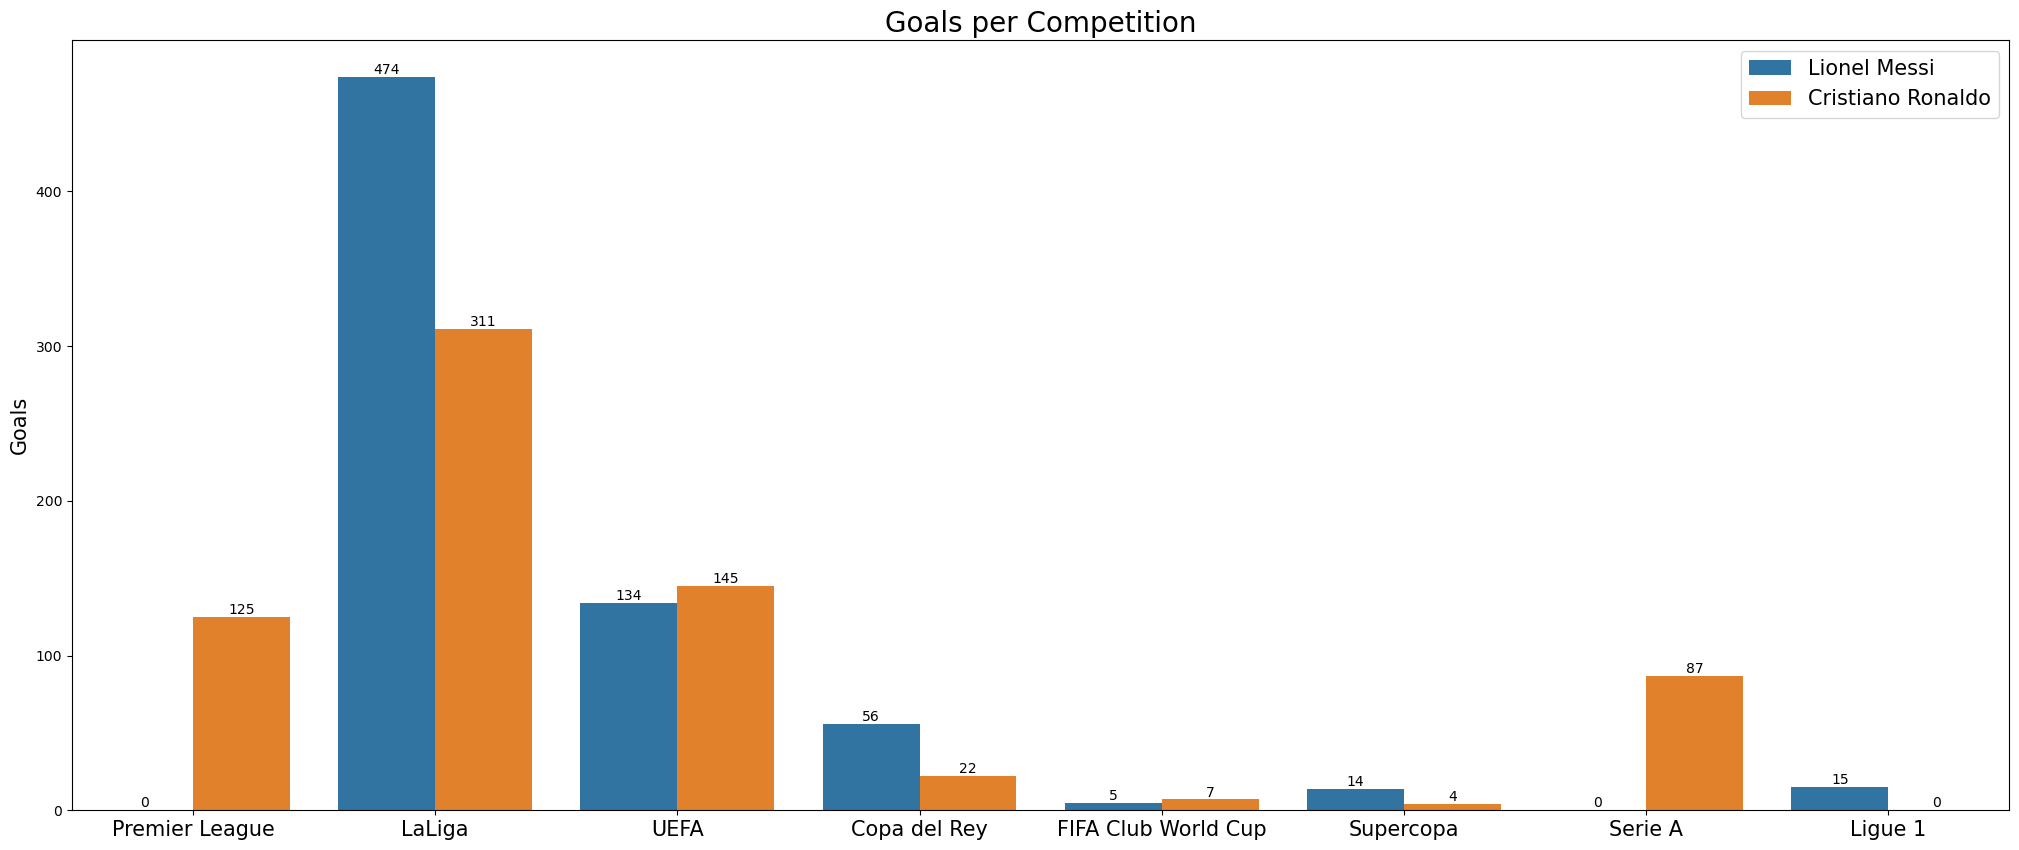

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="Competition", hue="Player", data=df,
              hue_order=['Lionel Messi','Cristiano Ronaldo'],
              ax=ax)
for container in p.containers:
    p.bar_label(container)
plt.title("Goals per Competition", fontsize=20)
plt.xticks(fontsize=15)
xt = plt.xticks
plt.xlabel('',fontsize=15)
plt.ylabel('Goals', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Performance by Year

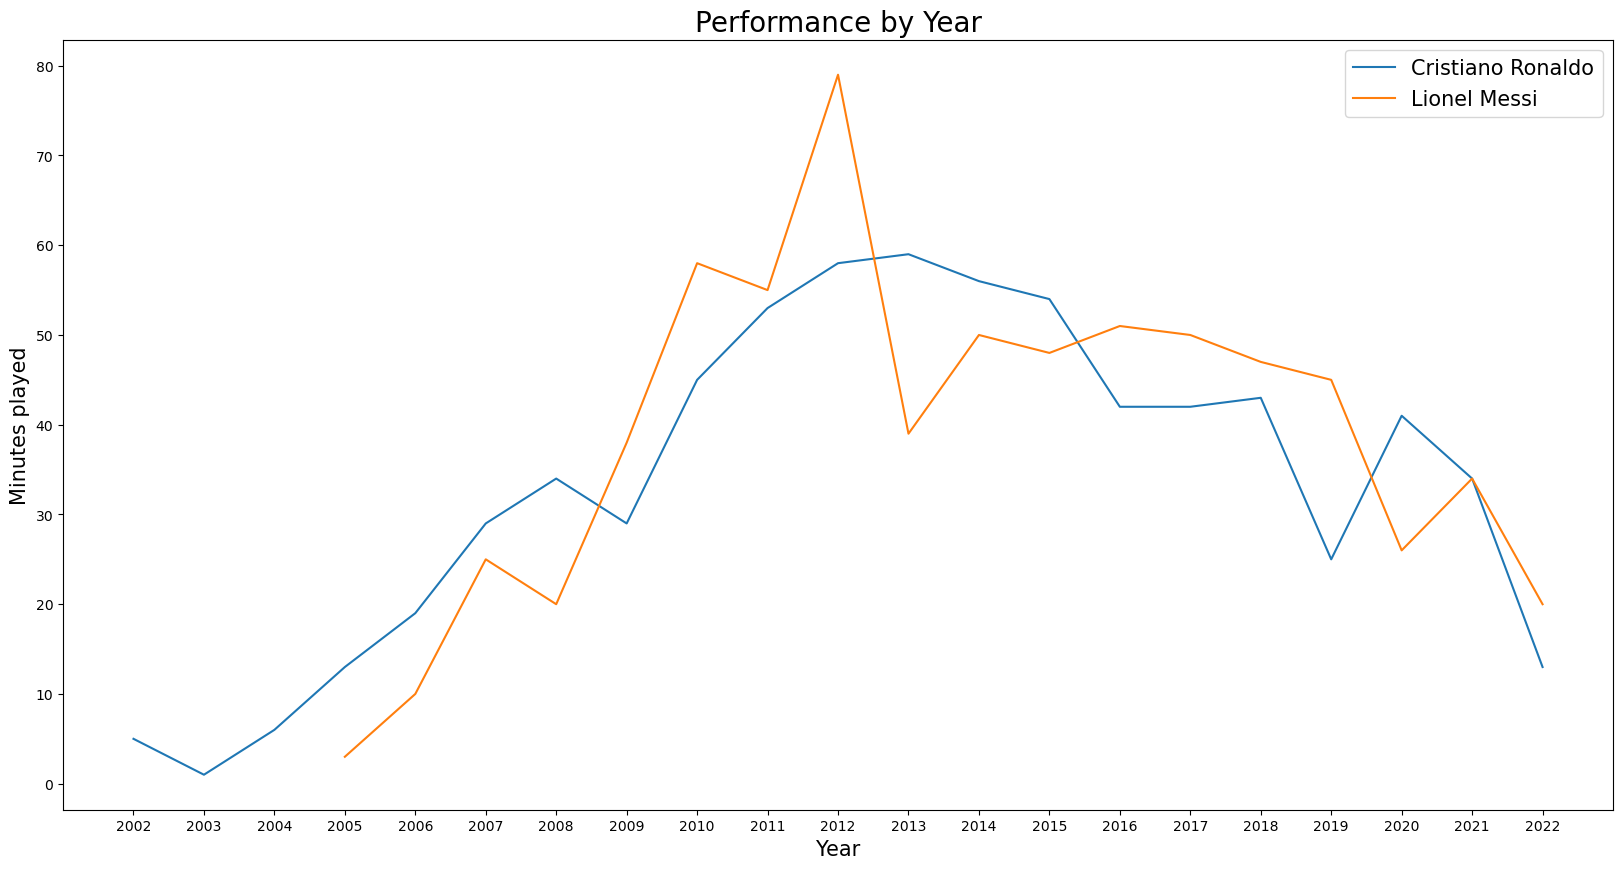

In [19]:
plt.figure(figsize=(20,10))

# group the data by year and player and calculate the total feature
goals_by_year_player = df.groupby(["Year","Player"])["Minute"].count()
goals_by_year_player = goals_by_year_player.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Year", y="Minute", hue="Player", data=goals_by_year_player)

# add a title and axis labels
plt.title("Performance by Year",fontsize=20)
plt.xlabel("Year",fontsize=15 )
plt.ylabel("Minutes played",fontsize=15)
plt.legend(fontsize=15)

# show the plot
plt.show()

Performance by Month

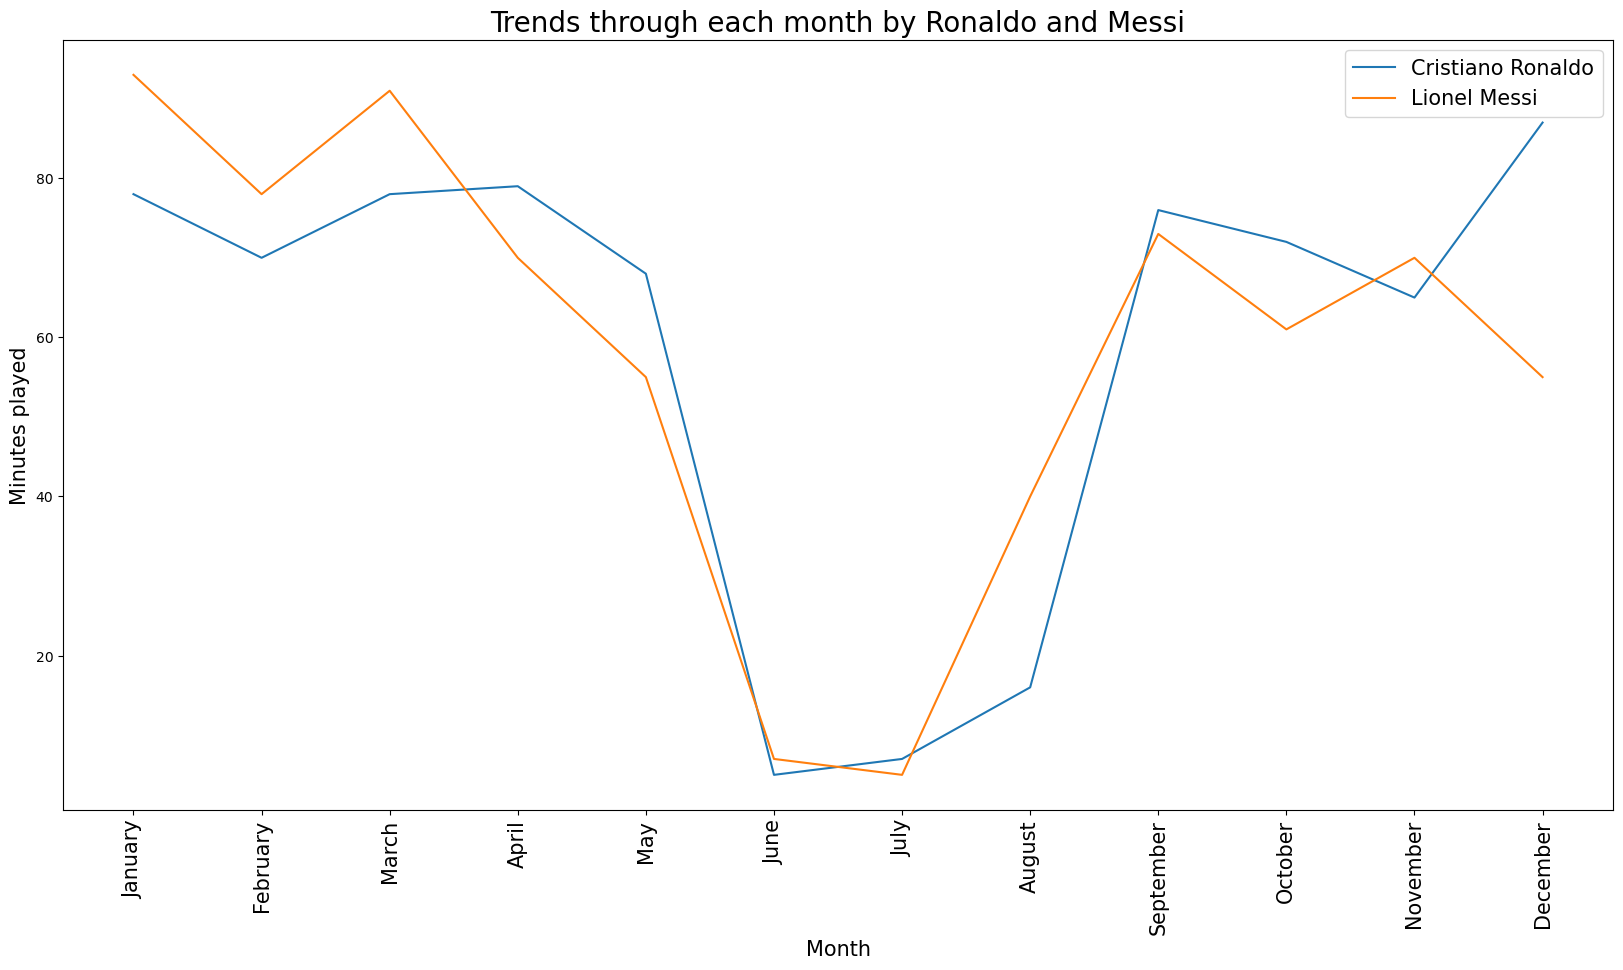

In [20]:
import calendar

plt.figure(figsize=(20,10))

# group the data by month and player and calculate the total feature
goals_by_month_player = df.groupby(["Month","Player"])["Minute"].count()
goals_by_month_player = goals_by_month_player.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Month", y="Minute", hue="Player", data=goals_by_month_player)

# add a title and axis labels
plt.title("Trends through each month by Ronaldo and Messi",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Minutes played",fontsize=15)
plt.legend(fontsize=15)

# set the x-tick labels as the names of the months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=90,fontsize=15)

# show the plot
plt.show()

Performance by Day

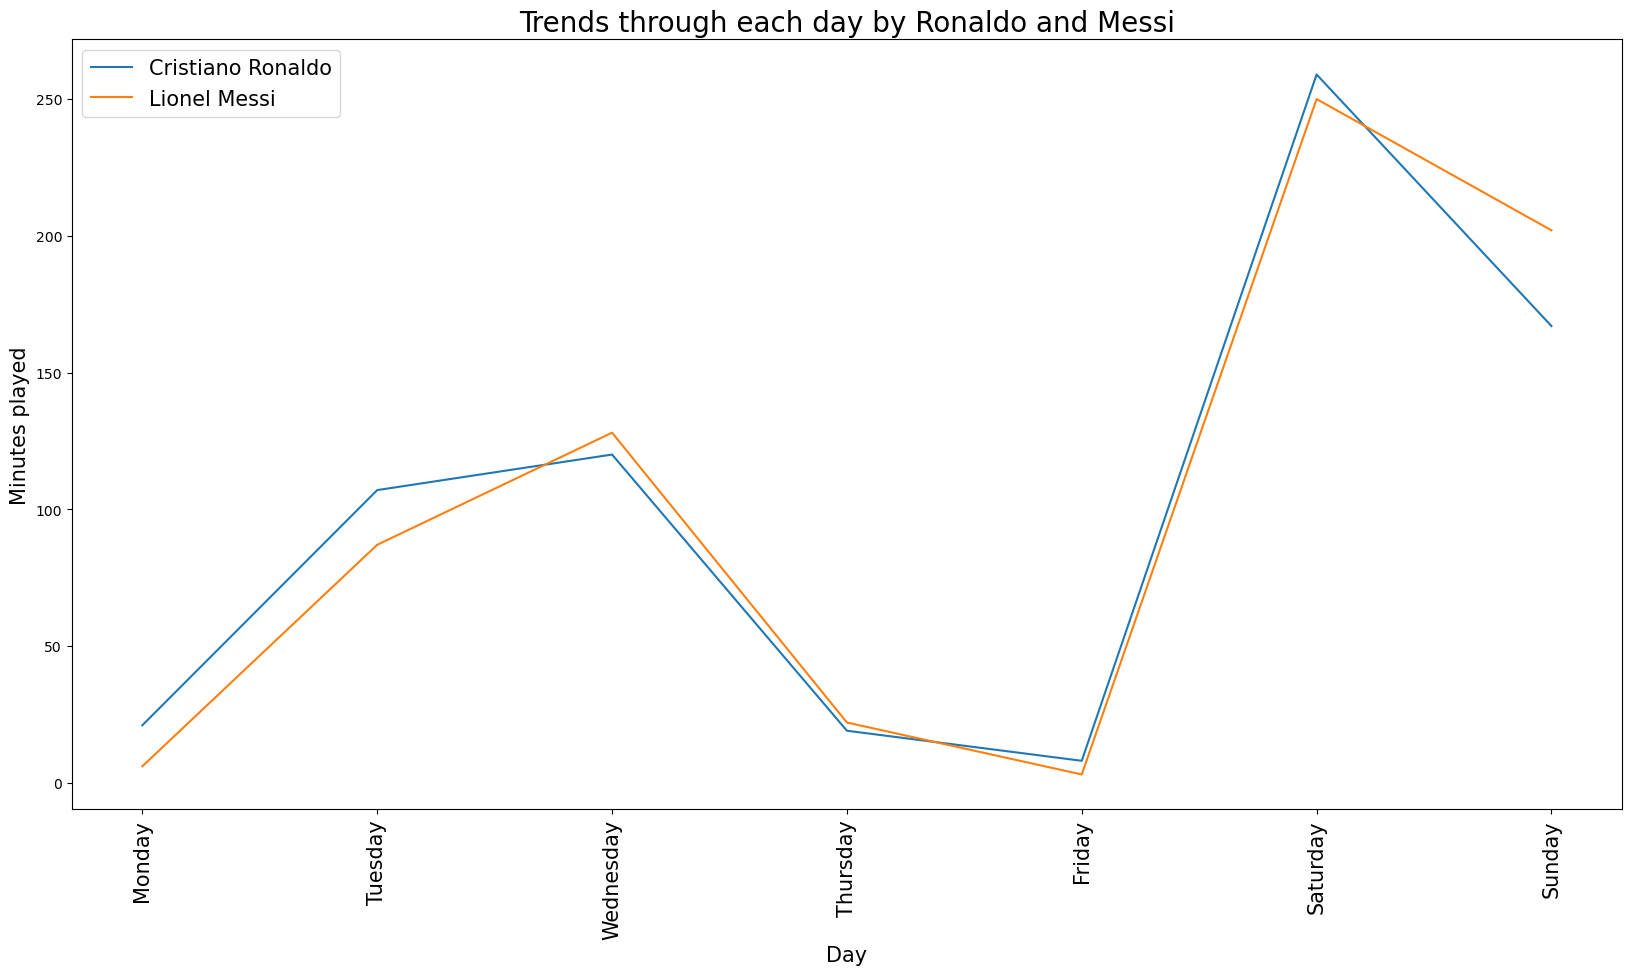

In [21]:
plt.figure(figsize=(20,10))

# group the data by day and player and calculate the total feature
goals_by_day_player = df.groupby(["Day","Player"])["Minute"].count()
goals_by_day_player = goals_by_day_player.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Day", y="Minute", hue="Player", data=goals_by_day_player)

# add a title and axis labels
plt.title("Trends through each day by Ronaldo and Messi",fontsize=20)
plt.xlabel("Day",fontsize=15)
plt.ylabel("Minutes played",fontsize=15)
plt.legend(fontsize=15)

# set the x-tick labels as the names of the days
plt.xticks(range(7), [calendar.day_name[i] for i in range(7)], rotation=90,fontsize=15)

# show the plot
plt.show()

Win Lose Draw

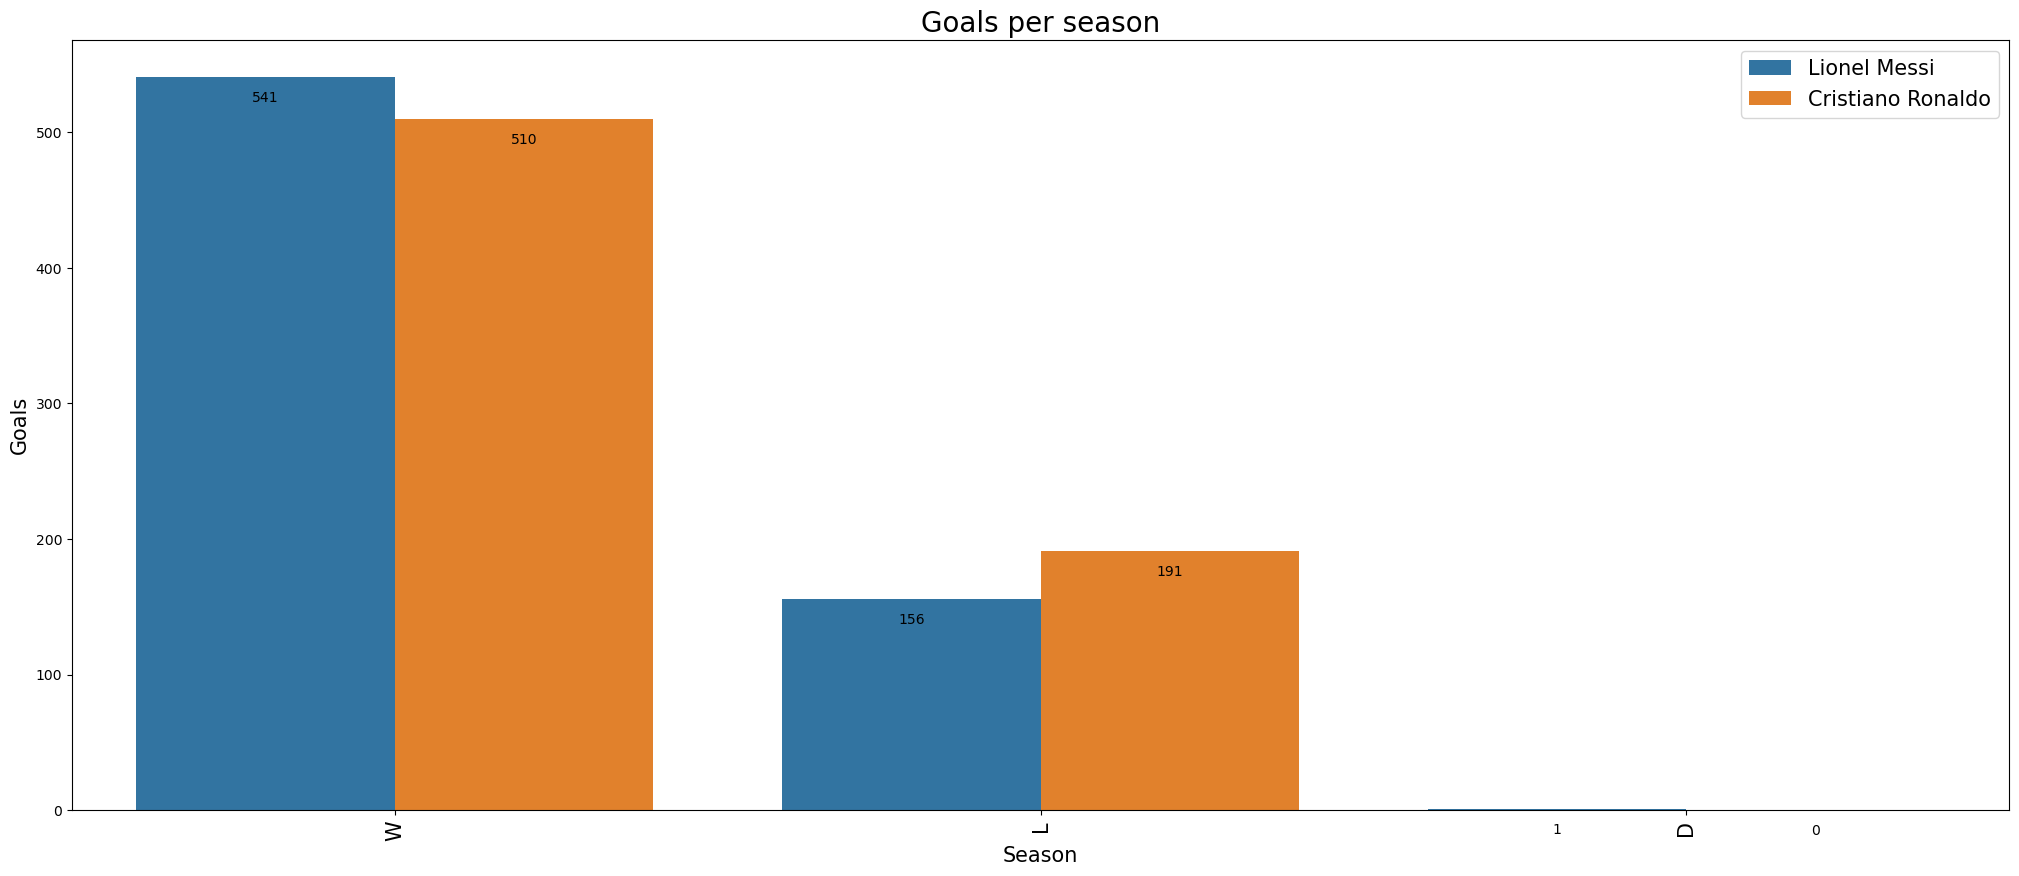

In [22]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="WDL", hue="Player", data=df,
              hue_order=['Lionel Messi','Cristiano Ronaldo'],
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-20)
plt.title("Goals per season", fontsize=20)
plt.xticks(fontsize=15, rotation='vertical')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Goals', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Performance - Home vs Away

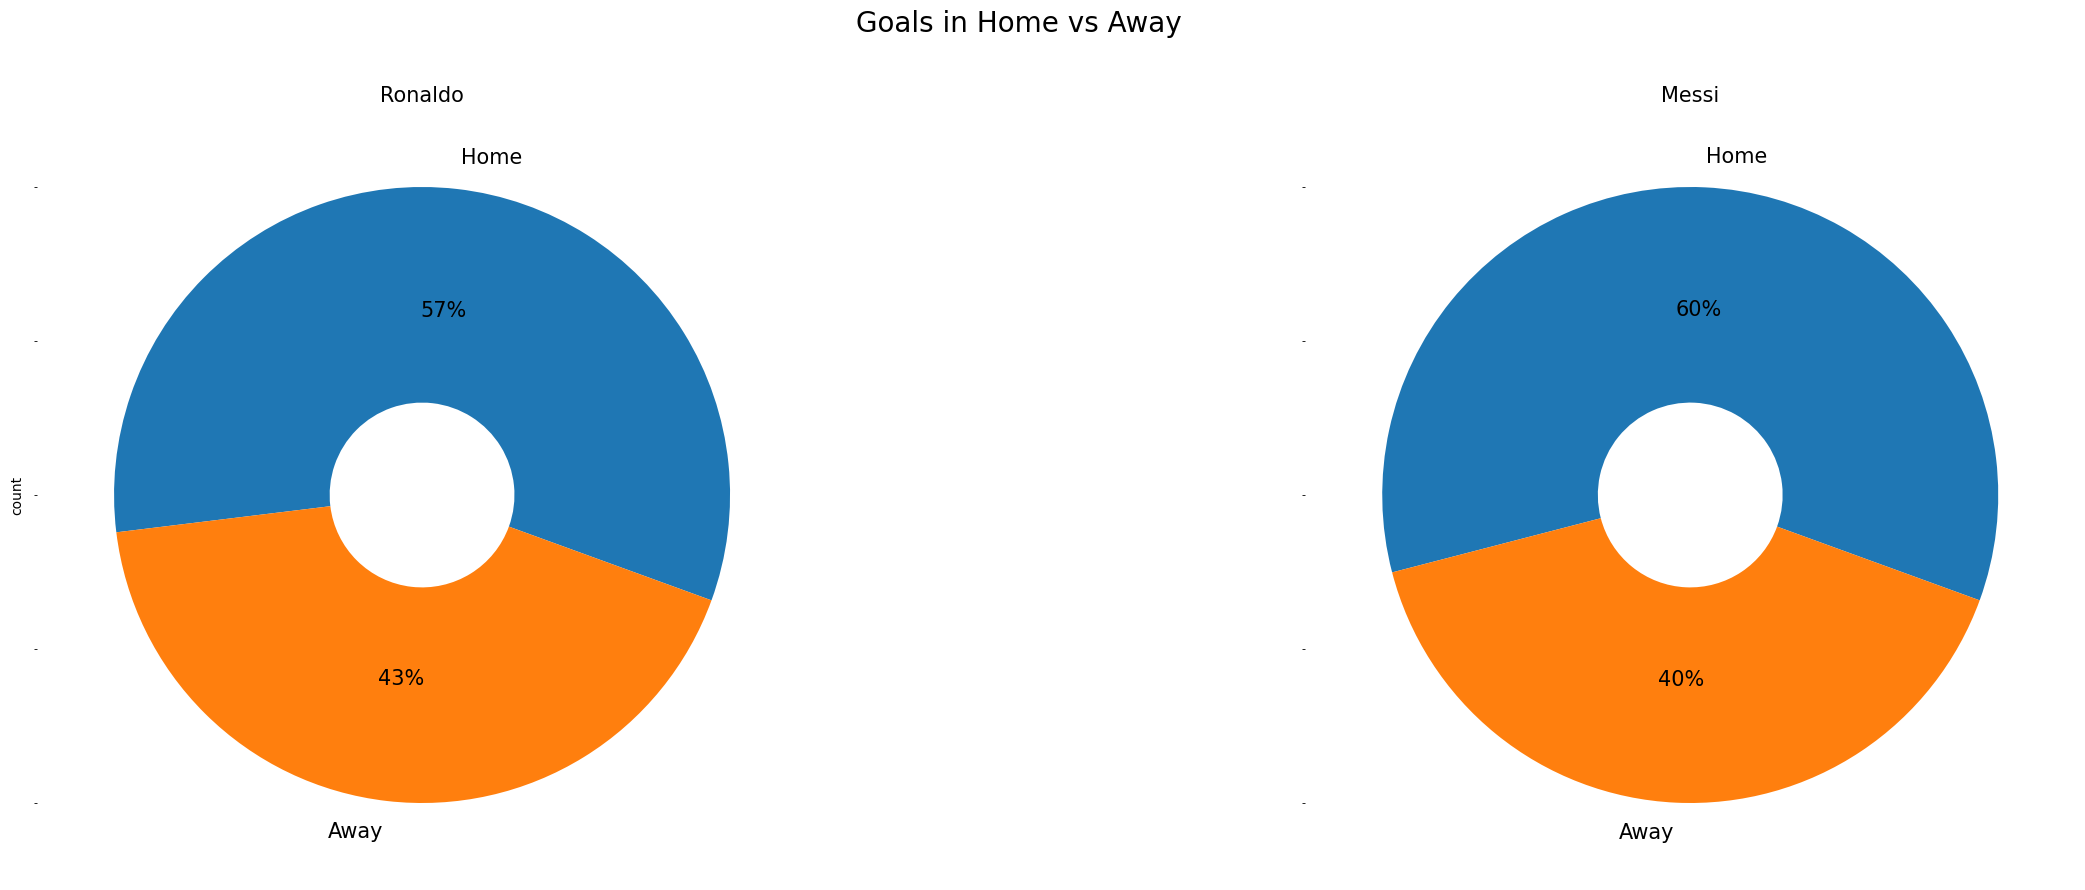

In [23]:
fig,(ax1, ax2) = plt.subplots(1, 2,figsize=(30,10), sharey=True)

fig.suptitle('Goals in Home vs Away', fontsize=20)
ax1.set_title('Ronaldo', fontsize=15)
ax2.set_title('Messi', fontsize=15)

df[df['Player']=='Cristiano Ronaldo'].Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], 
                                                                wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  
                                                                textprops={'fontsize': 15}, ax=ax1)

df[df['Player']=='Lionel Messi'].Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], 
                                                                wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  
                                                                textprops={'fontsize': 15}, ax=ax2)

plt.show()

Goals With Assist and No Assist

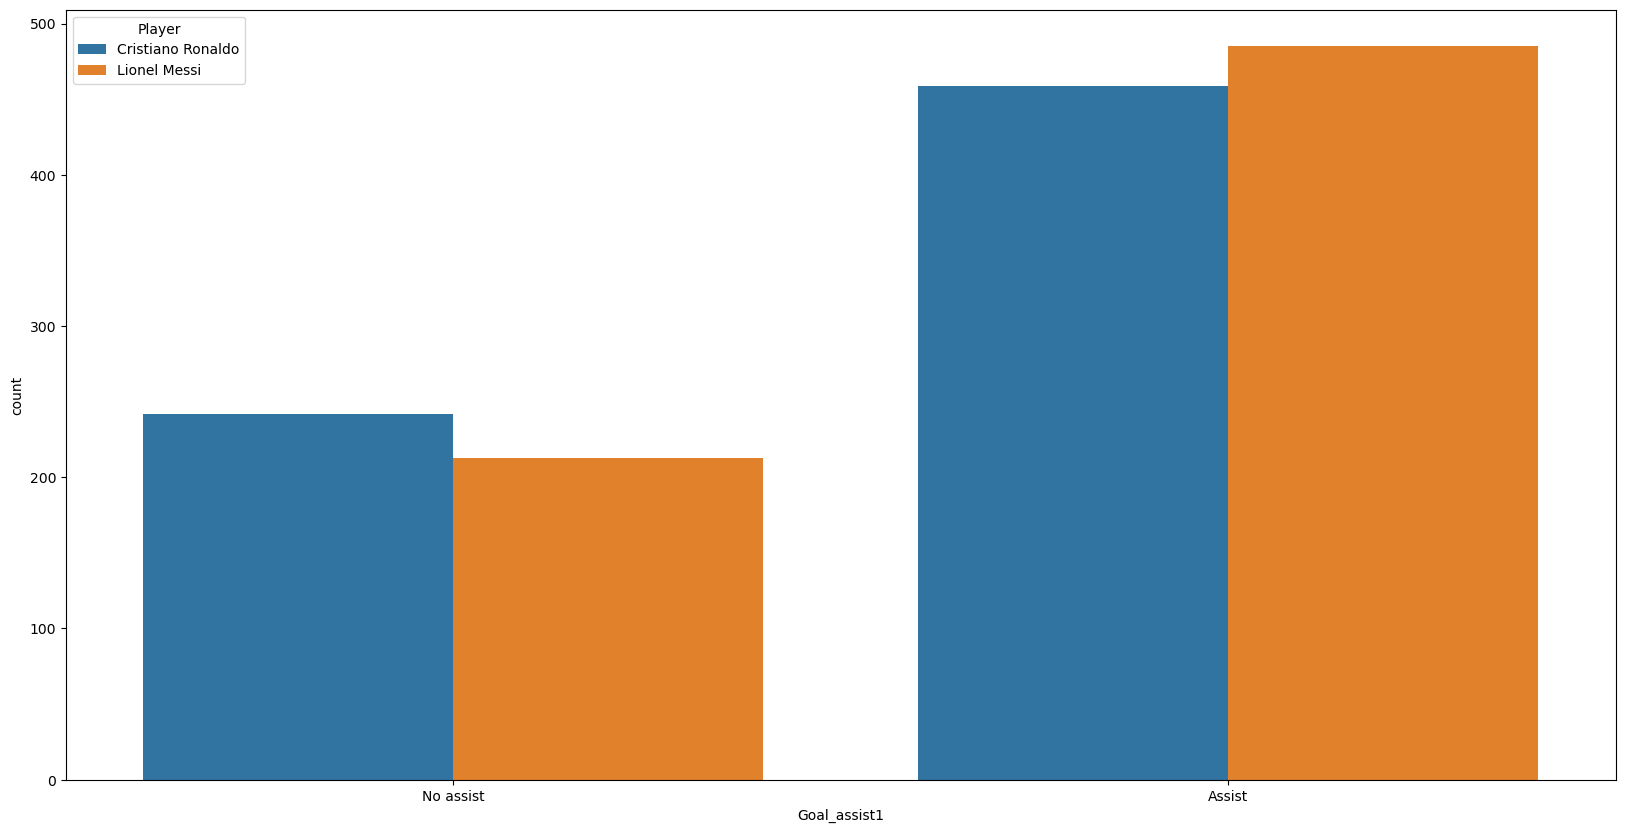

In [25]:
plt.figure(figsize=(20,10))

sns.countplot(x='Goal_assist1', data=df, hue='Player')
plt.show()

Top Opponents

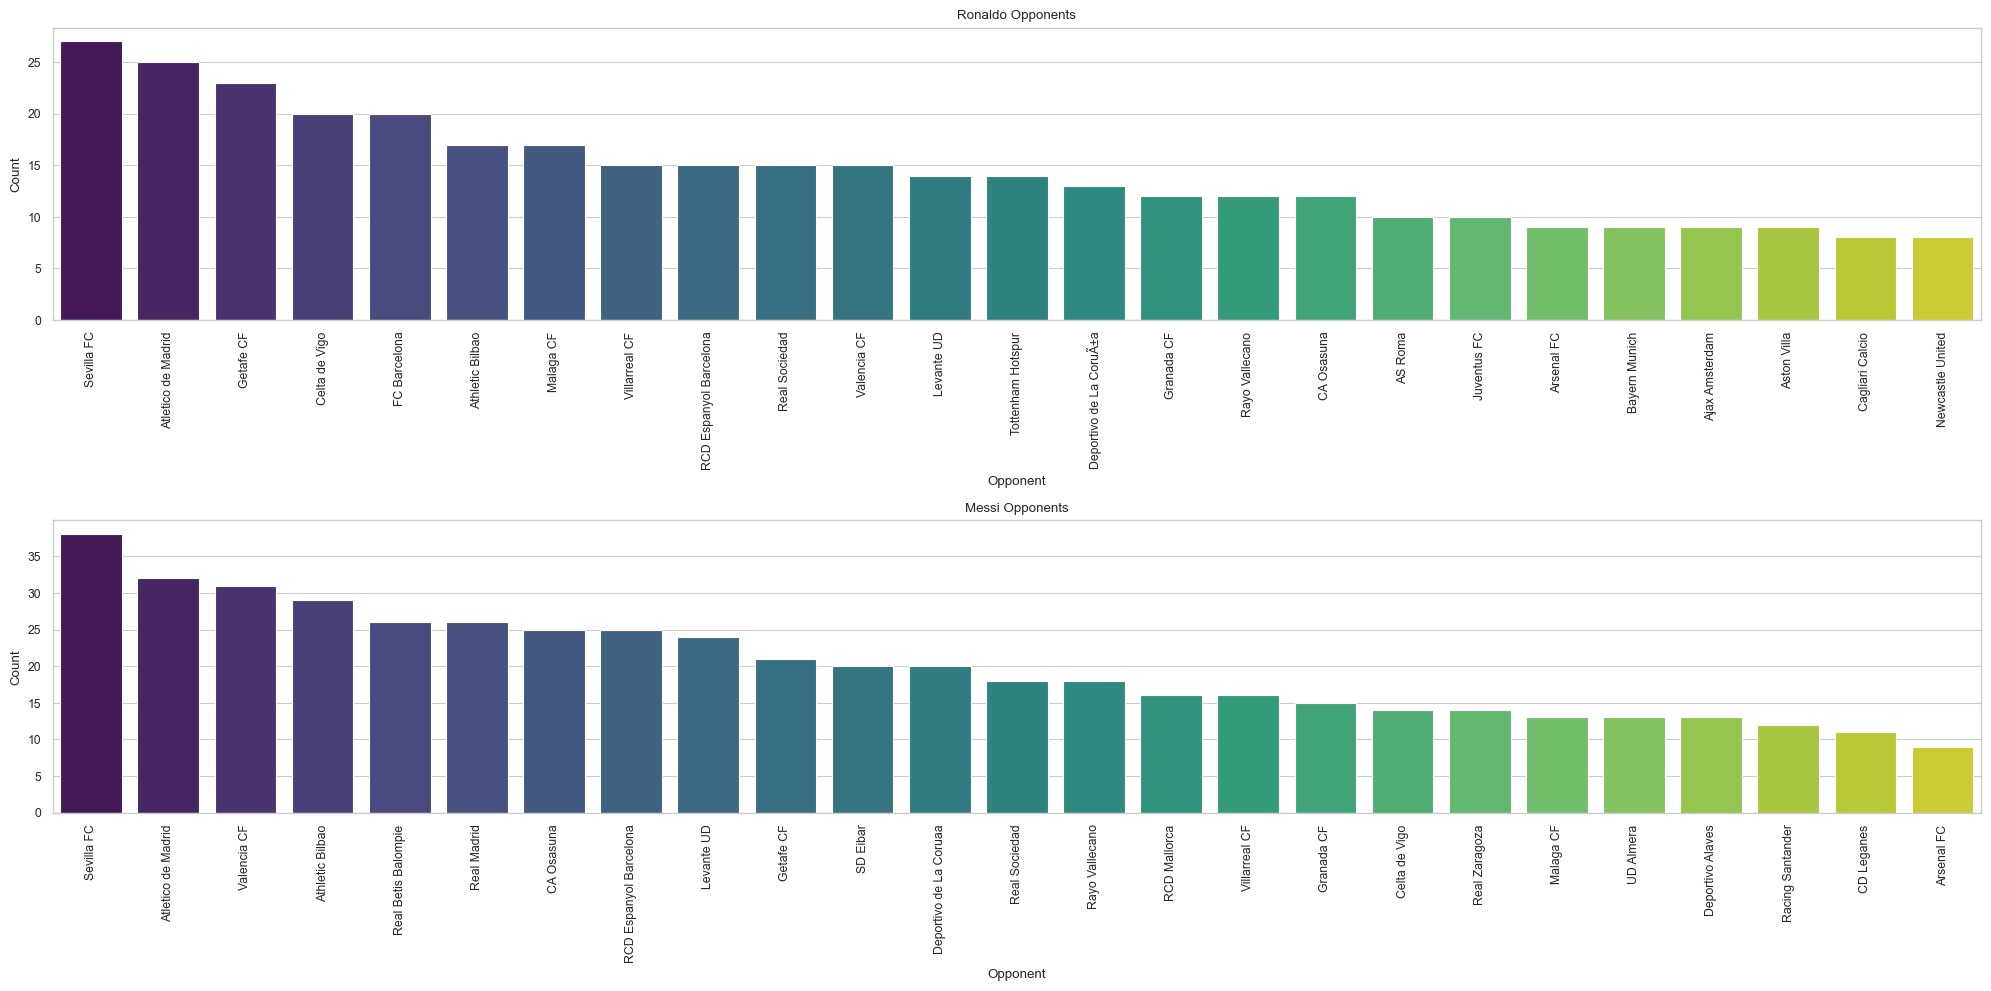

In [34]:
top_opponents_cr = df[df.Player == 'Cristiano Ronaldo'].Opponent.value_counts().head(25).index.tolist()
top_opponents_lm = df[df.Player == 'Lionel Messi'].Opponent.value_counts().head(25).index.tolist()

# Creating subplots
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Subplot for Ronaldo
plt.subplot(2, 1, 1)
sns.set_context("paper")
sns.countplot(data=df[df.Player == 'Cristiano Ronaldo'], x='Opponent', order=top_opponents_cr, palette='viridis')
plt.title("Ronaldo Opponents")
plt.xticks(rotation=90)
plt.xlabel('Opponent')
plt.ylabel('Count')

# Subplot for Messi
plt.subplot(2, 1, 2)
sns.set_context("paper")
sns.countplot(data=df[df.Player == 'Lionel Messi'], x='Opponent', order=top_opponents_lm, palette='viridis')
plt.title("Messi Opponents")
plt.xticks(rotation=90)
plt.xlabel('Opponent')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
Top Assists

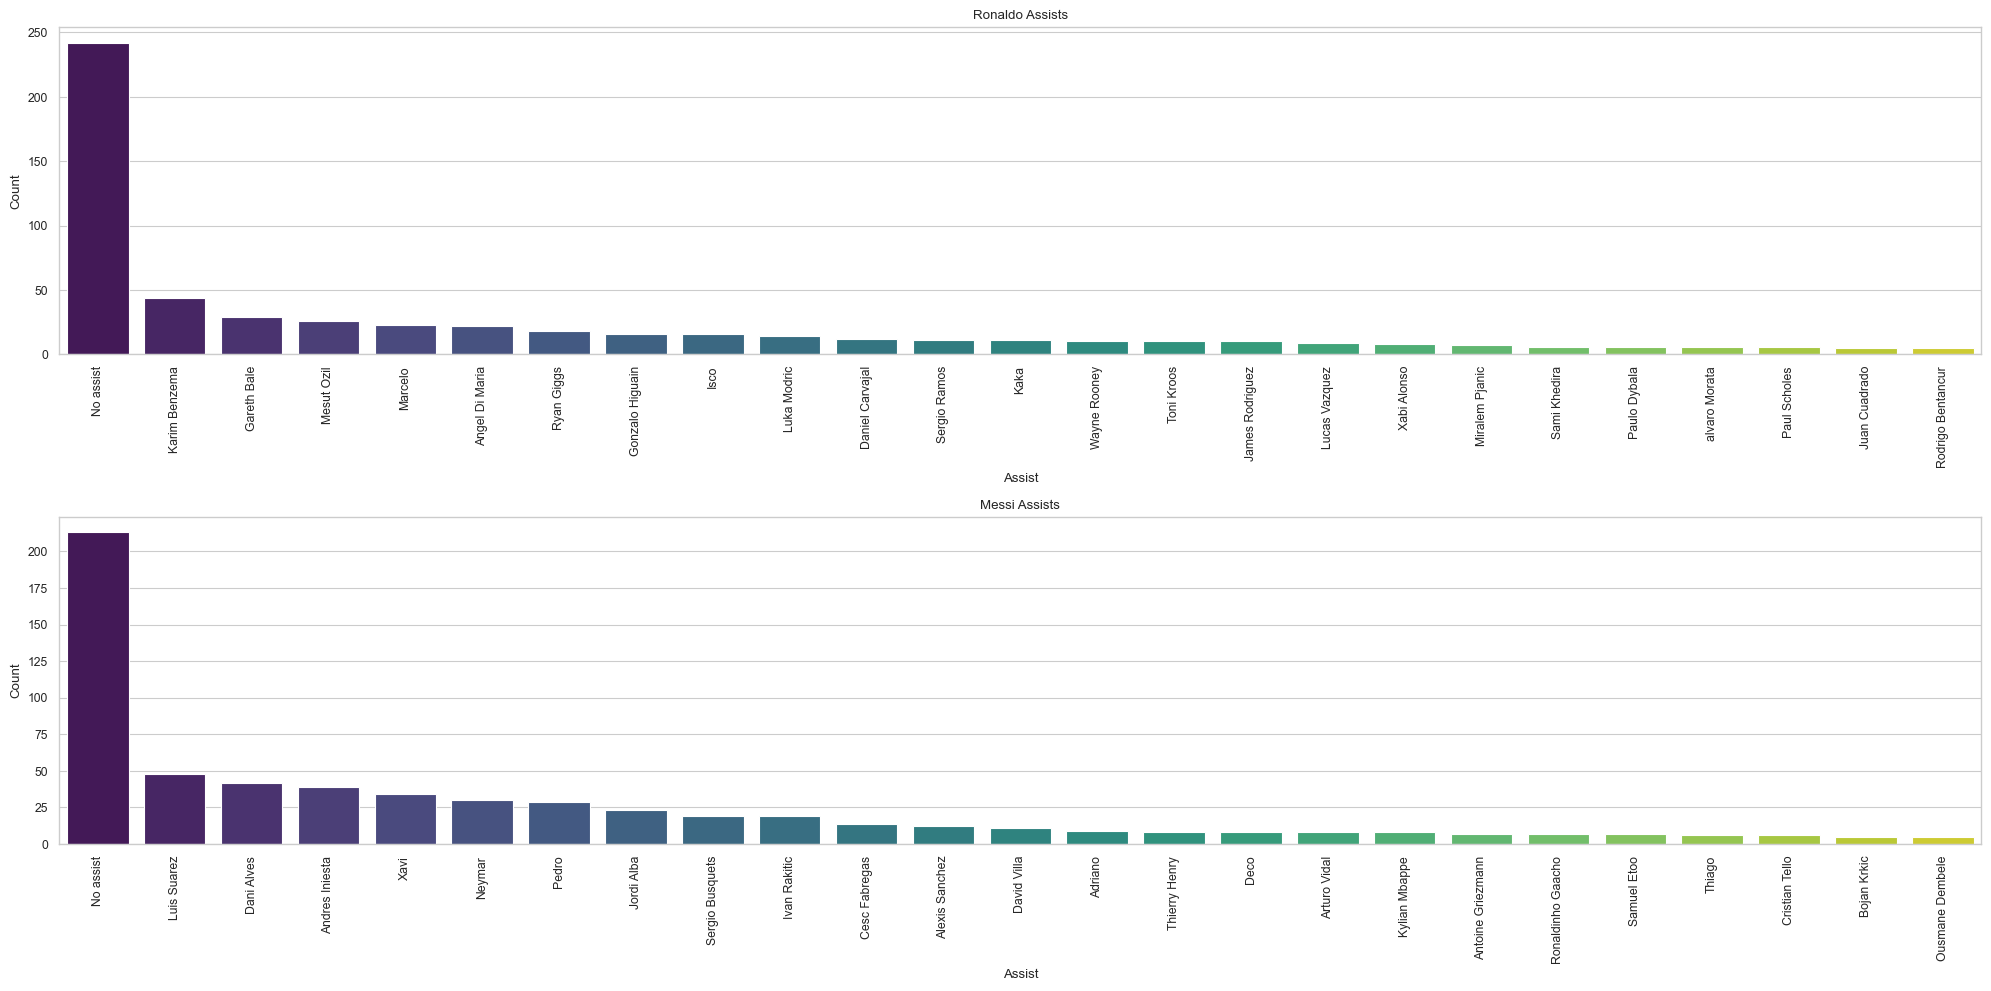

In [35]:
# Extracting top assists for Ronaldo and Messi
top_assists_cr = df[df.Player == 'Cristiano Ronaldo'].Goal_assist.value_counts().head(25).index.tolist()
top_assists_lm = df[df.Player == 'Lionel Messi'].Goal_assist.value_counts().head(25).index.tolist()

# Creating subplots
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# Subplot for Ronaldo
plt.subplot(2, 1, 1)
sns.countplot(data=df[df.Player == 'Cristiano Ronaldo'], x='Goal_assist', order=top_assists_cr, palette='viridis')
plt.title("Ronaldo Assists")
plt.xticks(rotation=90)
plt.xlabel('Assist')
plt.ylabel('Count')

# Subplot for Messi
plt.subplot(2, 1, 2)
sns.countplot(data=df[df.Player == 'Lionel Messi'], x='Goal_assist', order=top_assists_lm, palette='viridis')
plt.title("Messi Assists")
plt.xticks(rotation=90)
plt.xlabel('Assist')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
df.to_csv("data (03).csv")

In [42]:
top_opponents_cr = df[df.Player == 'Cristiano Ronaldo'].Opponent.value_counts().head(25).index.tolist()
top_opponents_cr

['Sevilla FC',
 'Atletico de Madrid',
 'Getafe CF',
 'Celta de Vigo',
 'FC Barcelona',
 'Athletic Bilbao',
 'Malaga CF',
 'Villarreal CF',
 'RCD Espanyol Barcelona',
 'Real Sociedad',
 'Valencia CF',
 'Levante UD',
 'Tottenham Hotspur',
 'Deportivo de La CoruÃ±a',
 'Granada CF',
 'Rayo Vallecano',
 'CA Osasuna',
 'AS Roma',
 'Juventus FC',
 'Arsenal FC',
 'Bayern Munich',
 'Ajax Amsterdam',
 'Aston Villa',
 'Cagliari Calcio',
 'Newcastle United']

In [ ]:
top_opponents_cr = df[df.Player == 'Lionel Messi'].Opponent.value_counts().head(25).index.tolist()
top_opponents_cr